### Seattle Accident Severity

This notebook will be used to generate a model to predict the severity of an accident occurring in the Seattle area, given external conditions.

In [143]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## Business Understanding

In a world where commuting is inevitable, for work, leisure or otherwise, accidents seem to be unavoidable due to the sheer density of cars on the road and a need to get from point A to B as fast as possible. Accidents also tend to affect others as a source of traffic congestion, especially in areas of higher population density. 

In a motor vehicle, the risk of an accident is always present, however, its likelihood as well as severity can be affected by many external factors such as visibility, road conditions, weather conditions etc. These factors are mostly out of our control, however, it would be extremely helpful if we were to know just how much these factors can contribute to the severity of an accident happening, to educate the driver to exercise more caution in certain conditions and circumstances as well as to provide alternative routes to avoid such an unfortunate event.

## Data Understanding

In order to gain insight into the contributions of external factors to collisions, we will review the Collisions - All Years dataset which comprises traffic collision data from the Seattle Police Department from the year 2004 to present.

In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#import dataset
df = pd.read_csv("C:/Users/Trevy/Desktop/Data Sci Course/IBM DS/Final/Data-Collisions.csv")
df.head()

C:\Users\Trevy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
#Observe dataset
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [5]:
#Observe variation in data types
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

Description based values cannot be implemented into a model and will be filtered out as a result. This study will not consider the location of the accidents and the corresponding coordinates will be removed. Some of the attributes are also responses to accidents, such as PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT which are results of an accident and is not expected to contribute to the effectiveness of the model.

SPEEDING may be a good attribute that can be used in our model, in addition to INATTENTIONIND.

In [135]:
#Look for null values in SPEEDING and INATTENTIONIND
df['SPEEDING'].count()

9333

In [134]:
df['SPEEDING'].isnull().sum()

185340

In [136]:
df['INATTENTIONIND'].count()

29805

In [137]:
df['INATTENTIONIND'].isnull().sum()

164868

As we can see, unfortunately, the both attributes contain too many null values to be used in our model and are consequently left out.

We now look at the distributions of WEATHER, LIGHTCOND and ROADCOND.

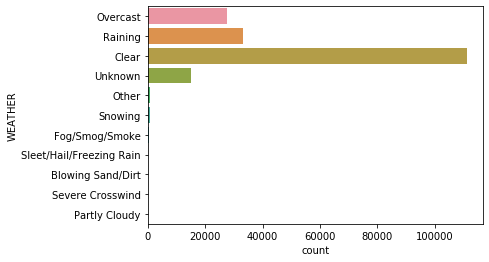

In [152]:
#Observe count plots of WEATHER, LIGHTCOND and ROADCOND
sns.countplot(y=df['WEATHER'],data=df)

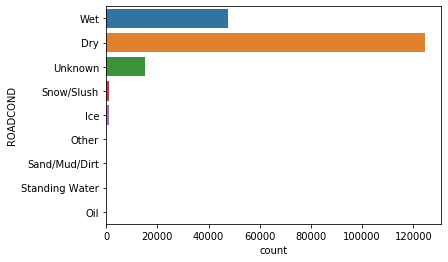

In [153]:
sns.countplot(y=df['ROADCOND'],data=df)

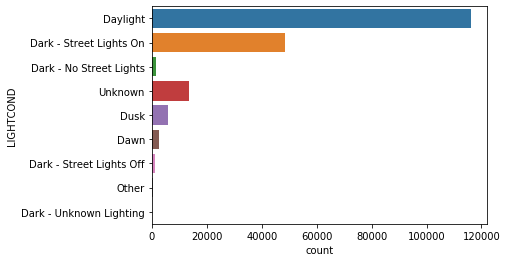

In [154]:
sns.countplot(y=df['LIGHTCOND'],data=df)

We extract the severity as the target variable and the weather, road conditions and light conditions as attributes.

In [7]:
#Chosen data
df2 = df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]

In [8]:
df2.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


## Data Preparation

In [9]:
df2.dtypes

SEVERITYCODE     int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

Observe the number of null values in the dataframe.

In [17]:
#Observe null values
df2.isnull().sum()

SEVERITYCODE       0
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
dtype: int64

In [20]:
df2.count()

SEVERITYCODE    194673
WEATHER         189592
ROADCOND        189661
LIGHTCOND       189503
dtype: int64

Remove all rows with null values.

In [23]:
#Remove null values
df2.dropna(inplace=True)

C:\Users\Trevy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df2.count()

SEVERITYCODE    189337
WEATHER         189337
ROADCOND        189337
LIGHTCOND       189337
dtype: int64

We observe that there is the "Unknown" and "Other" categories which do not provide useful information for the model. As a result, they are removed.

In [43]:
#Observe the categories such as Unknown and Other
df2['LIGHTCOND'].value_counts()

Daylight                    116077
Dark - Street Lights On      48440
Unknown                      13456
Dusk                          5889
Dawn                          2502
Dark - No Street Lights       1535
Dark - Street Lights Off      1192
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [44]:
df2['ROADCOND'].value_counts()

Dry               124300
Wet                47417
Unknown            15031
Ice                 1206
Snow/Slush           999
Other                131
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64

In [45]:
df2['WEATHER'].value_counts()

Clear                       111008
Raining                      33117
Overcast                     27681
Unknown                      15039
Snowing                        901
Other                          824
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [46]:
#Remove rows with Unknown and Other
df3 = df2[df2.WEATHER != 'Unknown']
df3 = df2[df2.WEATHER != 'Other']

In [47]:
df3 = df3[df3.ROADCOND != 'Unknown']
df3 = df3[df3.ROADCOND != 'Other']

In [48]:
df3 = df3[df3.LIGHTCOND != 'Unknown']
df3 = df3[df3.LIGHTCOND != 'Other']

In [49]:
df3.count()

SEVERITYCODE    170903
WEATHER         170903
ROADCOND        170903
LIGHTCOND       170903
dtype: int64

As we can see, the data is imbalanced where the severity is heavily biased in favour of 1.

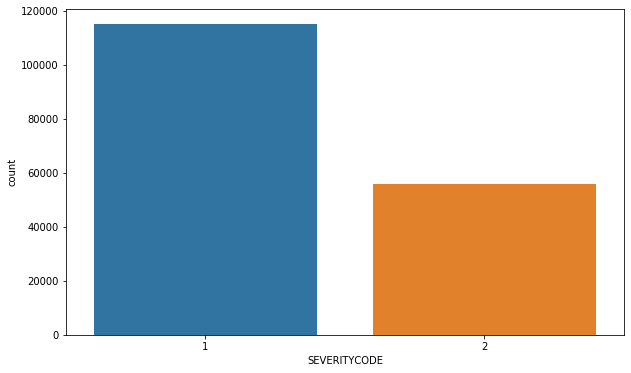

In [50]:
#Observe imbalanced dataset
plt.figure(figsize=(10,6))
sns.countplot(df3['SEVERITYCODE'],data=df3)

In [51]:
df3['SEVERITYCODE'].value_counts()

1    115028
2     55875
Name: SEVERITYCODE, dtype: int64

The dataset is shuffled. The data with the acceptable value is put aside and counted. The same number of observations are taken from the data with the value in excess and the dataset is concantenated. The observations are now balanced.

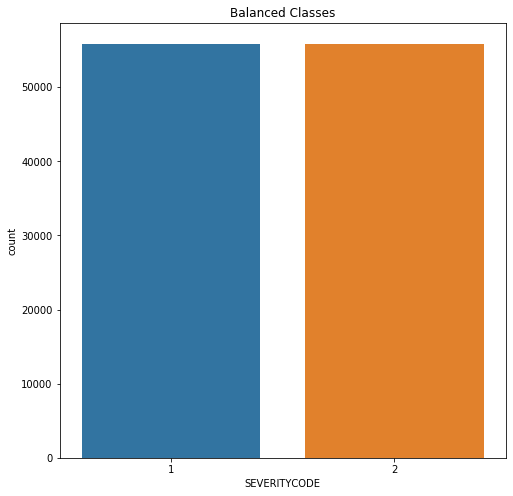

In [75]:
# Shuffle the Dataset.
df4 = df3.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
fraud_df = df4.loc[df4['SEVERITYCODE'] == 2]

#Randomly select 492 observations from the non-fraud (majority class)
non_fraud_df = df4.loc[df4['SEVERITYCODE'] == 1].sample(n=55875,random_state=42)

# Concatenate both dataframes again
bal_df = pd.concat([fraud_df, non_fraud_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('SEVERITYCODE', data=bal_df)
plt.title('Balanced Classes')
plt.show()

In [76]:
bal_df.count()

SEVERITYCODE    111750
WEATHER         111750
ROADCOND        111750
LIGHTCOND       111750
dtype: int64

In [77]:
bal_df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
158783,2,Raining,Wet,Daylight
69375,2,Overcast,Dry,Dark - Street Lights On
138284,2,Unknown,Wet,Dark - Street Lights On
140811,2,Clear,Dry,Daylight
24121,2,Overcast,Wet,Daylight


We observe that the weather, roadcond and lightcond columns are objects, as a result, we must apply one hot encoding to enumerate the objects.

In [78]:
#Apply one hot encoding
bal_df = pd.get_dummies(bal_df, columns=["WEATHER","ROADCOND","LIGHTCOND"])
bal_df.head()

,SEVERITYCODE,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,...,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk
158783,2,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
69375,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
138284,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
140811,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24121,2,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [79]:
#Define X
X = bal_df.loc[:,bal_df.columns != 'SEVERITYCODE']
X[0:5]

,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,...,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk
158783,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
69375,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
138284,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
140811,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24121,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [81]:
#Define y
y = bal_df['SEVERITYCODE'].values
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

We apply scaling to regulate the values.

In [82]:
#Apply scaling
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.63868381e-02, -1.32426731e+00, -5.67704286e-02,
        -4.30843445e-01, -5.18134715e-03,  2.04558353e+00,
        -1.07863168e-02, -2.53911537e-02, -6.59540460e-02,
        -7.16018252e-02, -1.57662952e+00, -7.93943758e-02,
        -1.84434382e-02, -2.00710434e-02, -6.65671230e-02,
        -2.44931062e-02,  1.62424414e+00, -8.90910982e-02,
        -7.95653994e-02, -6.09164615e-01, -6.68915027e-03,
        -1.20636971e-01,  7.06010811e-01, -1.86004536e-01],
       [-1.63868381e-02, -1.32426731e+00, -5.67704286e-02,
         2.32102870e+00, -5.18134715e-03, -4.88858062e-01,
        -1.07863168e-02, -2.53911537e-02, -6.59540460e-02,
        -7.16018252e-02,  6.34264417e-01, -7.93943758e-02,
        -1.84434382e-02, -2.00710434e-02, -6.65671230e-02,
        -2.44931062e-02, -6.15670991e-01, -8.90910982e-02,
        -7.95653994e-02,  1.64159239e+00, -6.68915027e-03,
        -1.20636971e-01, -1.41640891e+00, -1.86004536e-01],
       [-1.63868381e-02, -1.32426731e+00, -5.67704286e

## Modelling

The dataset is then split into the training and testing set.

In [83]:
#Split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print('Train set: ',X_train.shape,y_train.shape)
print('Test set: ',X_test.shape,y_test.shape)

Train set:  (78225, 24) (78225,)
Test set:  (33525, 24) (33525,)


The best k value is then tested.

In [87]:
#Find the best value for K
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 30
meanacc = np.zeros((Ks-1))
stdacc = np.zeros((Ks-1))
Cfsnmtx = [];
for i in range(1,Ks):
    neighbs = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat=neighbs.predict(X_test)
    meanacc[i-1]= metrics.accuracy_score(y_test,yhat)
    stdacc[i-1]= np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
meanacc

array([0.50067114, 0.50469799, 0.50061148, 0.5066965 , 0.50445936,
       0.50448919, 0.5056525 , 0.50478747, 0.50732289, 0.50436987,
       0.50359433, 0.50395227, 0.50195377, 0.50278896, 0.50252051,
       0.50278896, 0.50260999, 0.50431022, 0.50338553, 0.50434004,
       0.50401193, 0.5043997 , 0.50428039, 0.50466816, 0.50401193,
       0.5041909 , 0.50422073, 0.50410142, 0.50442953])

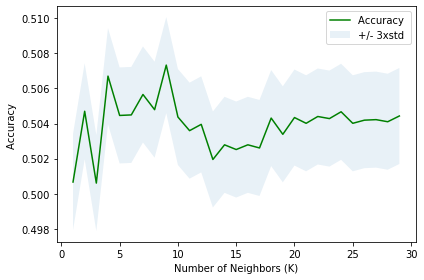

The best accuracy was with 0.5073228933631618 with k= 9


In [88]:
plt.plot(range(1,Ks),meanacc,'g')
plt.fill_between(range(1,Ks),meanacc - 1 * stdacc,meanacc + 1 * stdacc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", meanacc.max(), "with k=", meanacc.argmax()+1)

k is found to be 9.

In [89]:
#Apply best K to model
k = 9
neighbs = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat=neighbs.predict(X_test)
meanacc= metrics.accuracy_score(y_test,yhat)
meanacc

0.5073228933631618

The dataset is split again for use in the support vector matrix model.

In [90]:
#Split data again
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y,test_size=0.3,random_state=1)
print('Train set: ',X2_train.shape,y2_train.shape)
print('Test set: ',X2_test.shape,y2_test.shape)

Train set:  (78225, 24) (78225,)
Test set:  (33525, 24) (33525,)


The support vector matrix model is then applied.

In [92]:
#Apply SVM model
from sklearn import svm
sevsvm = svm.SVC(kernel='rbf')
sevsvm.fit(X2_train, y2_train)
y2hat = sevsvm.predict(X2_test)
print("SVM's Accuracy: ", metrics.accuracy_score(y2_test, y2hat))

C:\Users\Trevy\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM's Accuracy:  0.5164504101416854


The dataset is split a third time for use in the logistic regression model.

In [93]:
#Split data again
X3_train, X3_test, y3_train, y3_test = train_test_split(X,y,test_size=0.3,random_state=1)
print('Train set: ',X3_train.shape,y3_train.shape)
print('Test set: ',X3_test.shape,y3_test.shape)

Train set:  (78225, 24) (78225,)
Test set:  (33525, 24) (33525,)


The logistic regression model is then applied.

In [94]:
#Apply Logistic Regression model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X3_train,y3_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
y3hat = LR.predict(X3_test)
print("LR Accuracy: ", metrics.accuracy_score(y3_test, y3hat))

LR Accuracy:  0.5153765846383296


The dataset is split a fourth and final time for use in the decision trees model.

In [96]:
#Split the data again.
X4_train, X4_test, y4_train, y4_test = train_test_split(X,y,test_size=0.3,random_state=1)
print('Train set: ',X4_train.shape,y4_train.shape)
print('Test set: ',X4_test.shape,y4_test.shape)

Train set:  (78225, 24) (78225,)
Test set:  (33525, 24) (33525,)


The decision trees model was then applied and tested.

In [101]:
#Apply decision tree model
from sklearn.tree import DecisionTreeClassifier
sevTree = DecisionTreeClassifier(criterion="entropy",max_depth=6)
sevTree
sevTree.fit(X4_train,y4_train)
predTree = sevTree.predict(X4_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y4_test, predTree))

DecisionTrees's Accuracy:  0.5169574944071589


## Evaluation

The results from each model were then evaluated via the jaccard similarity score, f1 score and the log loss in the case of logistic regression.

In [102]:
#Import evaluation metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [107]:
#Find jaccard and F1 scores for all models
knn_jaccard = jaccard_similarity_score(y_test,yhat )
knn_f1 = f1_score(y_test, yhat)
knn_jaccard,knn_f1

C:\Users\Trevy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


(0.5073228933631618, 0.6068223475921826)

In [108]:
svm_jaccard = jaccard_similarity_score(y2_test,y2hat)
svm_f1 = f1_score(y2_test, y2hat)
svm_jaccard,svm_f1

C:\Users\Trevy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


(0.5164504101416854, 0.3340043547923257)

In [116]:
lr_jaccard = jaccard_similarity_score(y3_test,y3hat)
lr_f1 = f1_score(y3_test, y3hat)
lr_jaccard,lr_f1

C:\Users\Trevy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


(0.5153765846383296, 0.39024207168324265)

In [117]:
#Find logloss for LR model
lr_prob = LR.predict_proba(X3_test)
lr_logloss = log_loss(y3_test, lr_prob)
lr_logloss

0.6922513174809344

In [118]:
tree_jaccard = jaccard_similarity_score(y4_test, predTree)
tree_f1 = f1_score(y4_test, predTree)
tree_jaccard,tree_f1

C:\Users\Trevy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


(0.5169574944071589, 0.33330588719637716)

In [121]:
headings = ['Algorithm','Jaccard','F1','LogLoss']
results = [['KNN',knn_jaccard,knn_f1,'NA'],['SVM',svm_jaccard,svm_f1,'NA'],['LogReg',lr_jaccard,lr_f1,lr_logloss],['Decision Tree',tree_jaccard,tree_f1,'NA']]

Accumulate and compare the results as shown:

In [128]:
#Put results into dataframe.
results = pd.DataFrame(results)
results.columns = headings
results.set_index('Algorithm')

,Jaccard,F1,LogLoss
Algorithm,,,
KNN,0.507323,0.606822,NA
SVM,0.516450,0.334004,NA
LogReg,0.515377,0.390242,0.692251
Decision Tree,0.516957,0.333306,NA


We can observe that the model with the highest Jaccard score was the Decision Tree model while the model with the highest F1 score was the K Nearest Neighbours model. Overall, we can say that K Nearest Neighbours performs the best of those tested. However, all of these models can be deemed as poor.

This shows that the attributes of LIGHTCOND, WEATHER and ROADCOND are poor indicators of determining the severity of an accident. Additionally, helpful attributes such as SPEED and INATTENTIONIND did not have enough data to be used in the model.